<font size="3">Questão de negócio.</font>

Nesse projeto, iremos ajudar a House Rocket, uma empresa fictícia, atuante no ramo imobiliário, que busca comprar casas por um menor preço, e revender por um valor maior, tendo a diferença do preço da compra e o preço da venda como seu lucro.

Iremos ajudar a empresa através de dados extraídos, fornecendo para o CEO da empresa as seguintes informações:
 °Quais imóveis a House Rocket deveria comprar e por qual preço?
 °Uma vez com o imóvel comprado, qual o melhor momento para vender o imóvel e por qual preço?
 
Com a resposta a essas perguntas, iremos entregar para o CEO, dois relatórios, sendo:
 °Relatório com as sugestões de compra de imóveis, e com o valor recomendado
 °Relatório com as sugestões de venda do imóvel, e com o valor recomendado
 


<font size="3">Premissas do Negócio</font>


<font size="3">Planejamento da solução</font>

Para resolver tal questão proposta pelo CEO da empresa fiz os seguintes passos:
°Coletei os dados do Kaggle.
°Agrupei os dados por região (zipcode).
°Dentro de cada região, encontrei a mediana dos preços dos imóveis.
°Vou sugerir os imóveis que estão com o preço de venda abaixo da preço mediano da região, e que estejam em boas condições.



<font size="3">Os 5 principais insights do projeto</font>


<font size="3">Resultados financeiros do projeto</font>

<font size="6">Imports.</font>

In [2]:
#import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import fixed
from IPython.core.display import HTML

<font size="6">Load Data</font>

In [3]:
#load data
data = pd.read_csv('kc_house_data.csv')

<font size="5">1 - Settings</font>

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 9]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    sns.set()
    
jupyter_settings()


def barplot(a,b,data):
    plot = sns.barplot(x=a, y=b, data=data, edgecolor='k', palette='flare')
    return plot

Populating the interactive namespace from numpy and matplotlib


<font size="5">2 - Verify Variable Types</font>

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<font size="5">3 - Change variable type</font>

In [6]:
data['date'] = pd.to_datetime(data['date'])

<font size="5">4 - Check NaN value</font>

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font size="5">5 - Descriptive Statistical</font>

In [8]:
statical = pd.DataFrame(data.describe().drop(['count', '75%']).T)

In [9]:
statical

mean            std         min            25%            50%            max
id            4580301520.865 2876565571.312 1000102.000 2123049194.000 3904930410.000 9900000190.000
price             540088.142     367127.196   75000.000     321950.000     450000.000    7700000.000
bedrooms               3.371          0.930       0.000          3.000          3.000         33.000
bathrooms              2.115          0.770       0.000          1.750          2.250          8.000
sqft_living         2079.900        918.441     290.000       1427.000       1910.000      13540.000
sqft_lot           15106.968      41420.512     520.000       5040.000       7618.000    1651359.000
floors                 1.494          0.540       1.000          1.000          1.500          3.500
waterfront             0.008          0.087       0.000          0.000          0.000          1.000
view                   0.234          0.766       0.000          0.000          0.000          4.000
condition              3.409          0.651       1.000          3.000          3.000          5.000
grade                  7.657          1.175       1.000          7.000          7.000         13.000
sqft_above          1788.391        828.091     290.000       1190.000       1560.000       9410.000
sqft_basement        291.509        442.575       0.000          0.000          0.000       4820.000
yr_built            1971.005         29.373    1900.000       1951.000       1975.000       2015.000
yr_renovated          84.402        401.679       0.000          0.000          0.000       2015.000
zipcode            98077.940         53.505   98001.000      98033.000      98065.000      98199.000
lat                   47.560          0.139      47.156         47.471         47.572         47.778
long                -122.214          0.141    -122.519       -122.328       -122.230       -121.315
sqft_living15       1986.552        685.391     399.000       1490.000       1840.000       6210.000
sqft_lot15         12768.456      27304.180     651.000       5100.000       7620.000     871200.000

<font size="6">CLEAN DATA</font>

<font size="5">1 - Delete Duplicate ID's</font>

In [10]:
data['id'].value_counts().head()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
Name: id, dtype: int64

In [11]:
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13 221900.000         3      1.000         1180      5650   1.000           0     0          3      7        1180              0      1955             0    98178 47.511 -122.257           1340        5650
1  6414100192 2014-12-09 538000.000         3      2.250         2570      7242   2.000           0     0          3      7        2170            400      1951          1991    98125 47.721 -122.319           1690        7639
2  5631500400 2015-02-25 180000.000         2      1.000          770     10000   1.000           0     0          3      6         770              0      1933             0    98028 47.738 -122.233           2720        8062
3  2487200875 2014-12-09 604000.000         4      3.000         1960      5000   1.000           0     0          5      7        1050            910      1965             0    98136 47.521 -122.393           1360        5000
4  1954400510 2015-02-18 510000.000         3      2.000         1680      8080   1.000           0     0          3      8        1680              0      1987             0    98074 47.617 -122.045           1800        7503

In [12]:
data['id'].nunique()

21436

In [13]:
data.drop_duplicates(subset=['id'], inplace=True, keep='first')

In [14]:
data['id'].shape

(21436,)

<font size="5">2 - Checking Outliers</font>

<AxesSubplot:xlabel='price'>

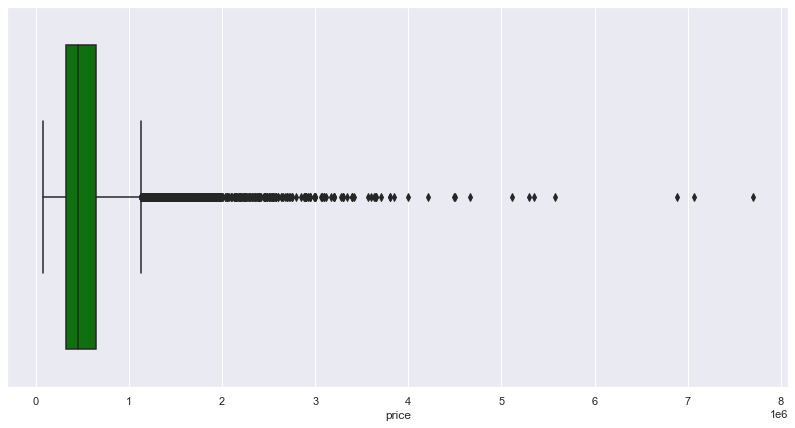

In [15]:
plt.figure(figsize=(14,7))
sns.boxplot(x=data['price'], color='green')


#about test of outliers, the amount of outliers will not impact the final result of the project

<font size="5">3 - Add New Features</font>

In [16]:
# converting sqft to m2
data['m2_living'] = data['sqft_living'].apply(lambda x: x*0.09290304)
data['m2_lot'] = data['sqft_lot'].apply(lambda x: x*0.09290304)
data['m2_basement'] = data['sqft_basement'].apply(lambda x: x*0.09290304)
data['m2_above'] = data['sqft_above'].apply(lambda x: x*0.09290304)

In [17]:
#create new columns about dates
#add column day
data['day'] = data['date'].dt.day 
#add column week of year 
data['week_of_year'] = data['date'].dt.isocalendar().week
#add column month 
data['month'] = data['date'].dt.month
#add column year
data['year'] = data['date'].dt.year


<font size="6">Solution for First Business Questions</font>

<font size="5">Informations:</font>

Após uma limpeza prévia dos dados, onde ajustamos algumas colunas, criamos novas colunas, ajustamos os tipos de váriaveis,
é hora de começarmos a resolver as questões do CEO com embasamento dos dados que extraímos do DF, nos próximos códigos, você conseguirá compreender
a realização dos seguintes passos:

°Agrupar os imóveis por região ( zipcode ).

°Dentro de cada região, eu vou encontrar a mediana do preço do imóvel.

°Sugerir os imóveis que estão abaixo do preço mediano da região e que estejam e boas condições(condition >=4).

In [18]:
df2 = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df2.columns = ['zipcode', 'median_price']


In [19]:
data = pd.merge(data,df2, on='zipcode', how='inner')

In [20]:
data['status'] = 'N/A'

In [21]:
#add sugestions houses buy in DF

for i in range(len(data)):
    if (data.loc[i, 'price'] <= data.loc[i, 'median_price']) & (data.loc[i, 'condition'] >= 4):
        data.loc[i, 'status'] = 'buy'
    else:
        data.loc[i, 'status'] = 'not buy'

In [22]:
sugestion_buy = data[['id','zipcode','price','median_price','condition','status']].copy()
sugestion_buy.head()

id  zipcode      price  median_price  condition   status
0  7129300520    98178 221900.000    279000.000          3  not buy
1  4060000240    98178 205425.000    279000.000          4      buy
2  4058801670    98178 445000.000    279000.000          3  not buy
3  2976800796    98178 236000.000    279000.000          3  not buy
4  6874200960    98178 170000.000    279000.000          3  not buy

In [23]:
#csv file with recomendations buy
sugestion_buy.to_csv('suggested_buys.csv')

In [24]:
#take the profit with houses sell

profit = data[['price','median_price']].loc[data['status'] == 'buy']
profit['profit'] = profit[['price','median_price']].apply(lambda x: x['median_price'] - x['price'], axis=1)
print('Lucro estimado com base nas projeções de vendas {}'.format(profit['profit'].sum())) 

Lucro estimado com base nas projeções de vendas 376310918.5


<font size="5">Map with houses info</font>


In [25]:
min_price = data['price'].min()
max_price = data['price'].max()

In [26]:
#filter for map

f_price = widgets.IntSlider(
    min=min_price,
    max=max_price,
    step=1,
    description='Max Price:',
    disabled=False,
)

In [27]:
f_price

IntSlider(value=75000, description='Max Price:', max=7700000, min=75000)

In [28]:
#criando df para mapa com apenas as casas sugeridas para compra
buy_map = data.loc[data['status'] == 'buy']

In [29]:
buy_map

id       date       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  m2_living    m2_lot  m2_basement  m2_above  day  week_of_year  month  year  median_price status
1      4060000240 2014-06-23  205425.000         2      1.000          880      6780   1.000           0     0          4      6         880              0      1945             0    98178 47.501 -122.248           1190        6780     81.755   629.883        0.000    81.755   23            26      6  2014    279000.000    buy
10      561000075 2014-12-31  260000.000         3      1.000         1180      5350   1.500           0     0          4      6        1180              0      1959             0    98178 47.505 -122.259           1490        5350    109.626   497.031        0.000   109.626   31             1     12  2014    279000.000    buy
19     3352402236 2014-12-15  252500.000         3      2.000         1150      6000   1.000           0     0          5      7        1150              0      1956             0    98178 47.498 -122.263           1980        6360    106.838   557.418        0.000   106.838   15            51     12  2014    279000.000    buy
27      185000118 2015-02-23  212000.000         4      2.000         1880      7500   1.000           0     0          5      6         980            900      1946             0    98178 47.495 -122.266           1670       14350    174.658   696.773       83.613    91.045   23             9      2  2015    279000.000    buy
35     3810000465 2014-05-20  243000.000         2      1.000         1770      5522   1.500           0     0          4      7         960            810      1943             0    98178 47.497 -122.231           1830        7378    164.438   513.011       75.251    89.187   20            21      5  2014    279000.000    buy
66     8068000585 2014-08-27  235000.000         2      1.000          880      5600   1.000           0     0          5      7         880              0      1955             0    98178 47.507 -122.265           1240        7015     81.755   520.257        0.000    81.755   27            35      8  2014    279000.000    buy
68     7129300420 2014-12-02  258000.000         3      1.750         1040      5650   1.000           0     0          5      6        1040              0      1951             0    98178 47.511 -122.256           1290        5650     96.619   524.902        0.000    96.619    2            49     12  2014    279000.000    buy
79     1180008315 2014-07-15  212000.000         3      1.000         1040      6800   1.000           0     0          5      6        1040              0      1951             0    98178 47.492 -122.224           1430        6080     96.619   631.741        0.000    96.619   15            29      7  2014    279000.000    buy
110    1180007005 2014-06-25  265950.000         3      1.500         1150      8450   1.000           0     0          4      6        1150              0      1951             0    98178 47.493 -122.224           1160        6800    106.838   785.031        0.000   106.838   25            26      6  2014    279000.000    buy
114    4058801065 2014-08-08  272000.000         3      2.000         1200      5700   1.000           0     0          5      7        1200              0      1942             0    98178 47.503 -122.242           1190        6384    111.484   529.547        0.000   111.484    8            32      8  2014    279000.000    buy
122    7812801925 2014-06-24  230000.000         4      1.750         1850      6000   1.000           0     0          4      6        1270            580      1944             0    98178 47.492 -122.247           1270        6600    171.871   557.418       53.884   117.987   24            26      6  2014    279000.000    buy
129    7812800681 2015-01-02  166000.000         2      1.000      

In [30]:
#map for best view of suggested buys houses

def update_map(data, f_price):
    
    houses = buy_map[buy_map['price'] < f_price]
    fig = px.scatter_mapbox(houses,
                            lat='lat',
                            lon='long',
                            color='price',
                            size='price',
                            color_continuous_scale=px.colors.cyclical.IceFire, 
                            size_max=20, 
                            zoom=12)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    fig.show()

In [31]:
widgets.interactive( update_map, data=fixed(buy_map), f_price = f_price)

interactive(children=(IntSlider(value=75000, description='Max Price:', max=7700000, min=75000), Output()), _do…

<font size="6">Solution for Second Business Questions</font>

<font size="5">Segunda etapa</font>

Nessa segunda etapa do projeto, iremos com base nos dados, descobrir a melhor época do ano, onde a House Rocket poderá ter mais lucro ao vender as casas, para isso iremos:

°Agrupar os imoveis por região(zipcode) e por sazonalidade(estações do ano)

°Dentro de cada região e sazonalidade, calcular a mediana do preço

°Condições de venda:

    -Se o preço da compra for maior que a mediana da região + sazonalidade
        
        O preço da venda será igual ao preço da compra + 10%
    
    - Se o preço da compra for menor que a mediana da região + sazonalidade
        
        O preço da venda será igual ao preço da compra + 30%
        

In [32]:
data['season'] = 'N/A'

data['season'] = data['week_of_year'].apply(lambda x: 'summer' if (x >= 25) & (x <= 38) 
                                            else 'fall' if (x >= 39) & (x <= 50) 
                                            else 'spring' if (x > 11) & (x<= 24) 
                                            else 'winter')

In [33]:
# grouping by zipcode & season
df3 = data[['price','zipcode','season']].groupby(['zipcode','season']).median().reset_index()
df3.columns = ['zipcode', 'season','season_median_price']

data = pd.merge(data,df3, on=['zipcode','season'], how='inner')

In [34]:
#calculating sell price and profit with sell price
data['sell_price'] = data[['season_median_price','price']].apply(lambda x: (x['price']*0.1 + x['price']) if x['price'] >= x['season_median_price'] else (x['price']*0.3 + x['price']), axis=1)
data['profit'] = data[['sell_price','price']].apply(lambda x: x['sell_price'] - x['price'], axis=1)

In [35]:
#file with suggestive dates for the sale of properties
sellprice_profit = data[['id', 'zipcode', 'season', 'season_median_price', 'price', 'sell_price', 'profit']]
sellprice_profit.to_csv('suggested_sell.csv')

[Text(0.5, 1.0, 'Houses Prices Mean per Season')]

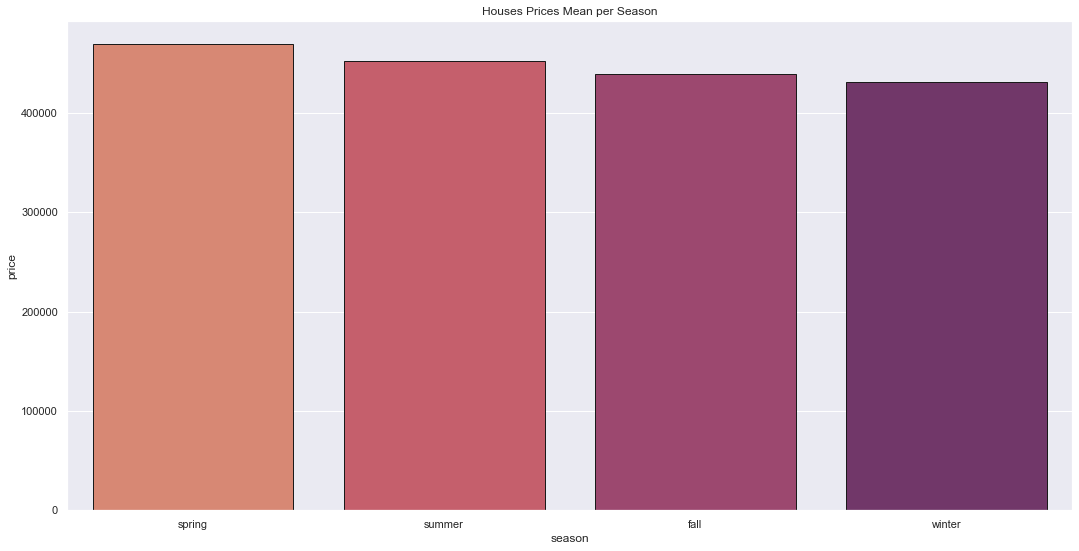

In [36]:
#graph median houses prices per season
season_sell = data[['season', 'price']].groupby('season').median().reset_index()
season_sell.sort_values(by='price', ascending=False, inplace=True)
barplot('season', 'price', season_sell).set(title='Houses Prices Mean per Season')



[Text(0.5, 1.0, 'Best Season for Profit')]

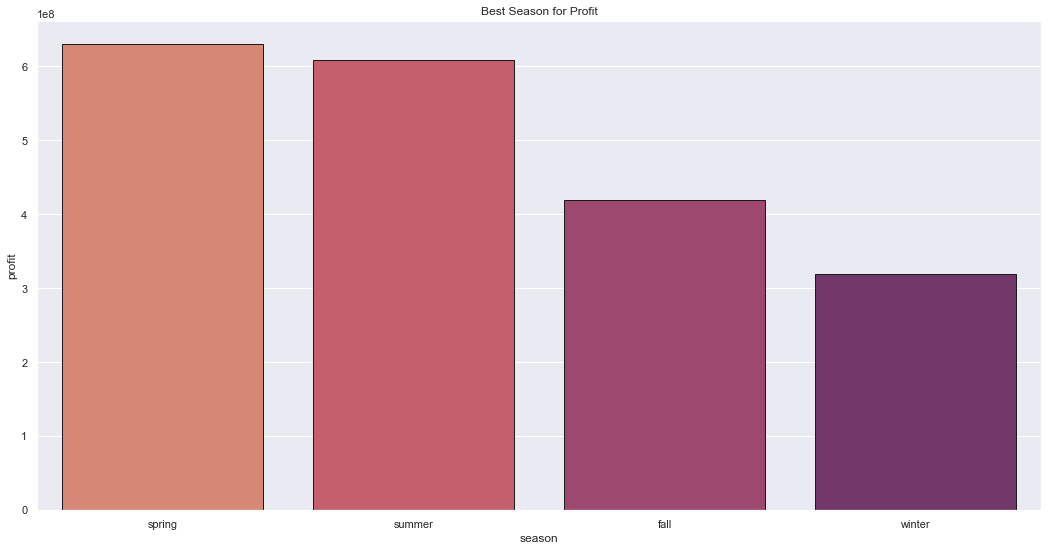

In [37]:
#best profit per season
aux = sellprice_profit[['profit', 'season']].groupby('season').sum().reset_index()
aux.sort_values(by='profit', ascending=False, inplace=True)
barplot('season', 'profit', aux).set(title='Best Season for Profit')

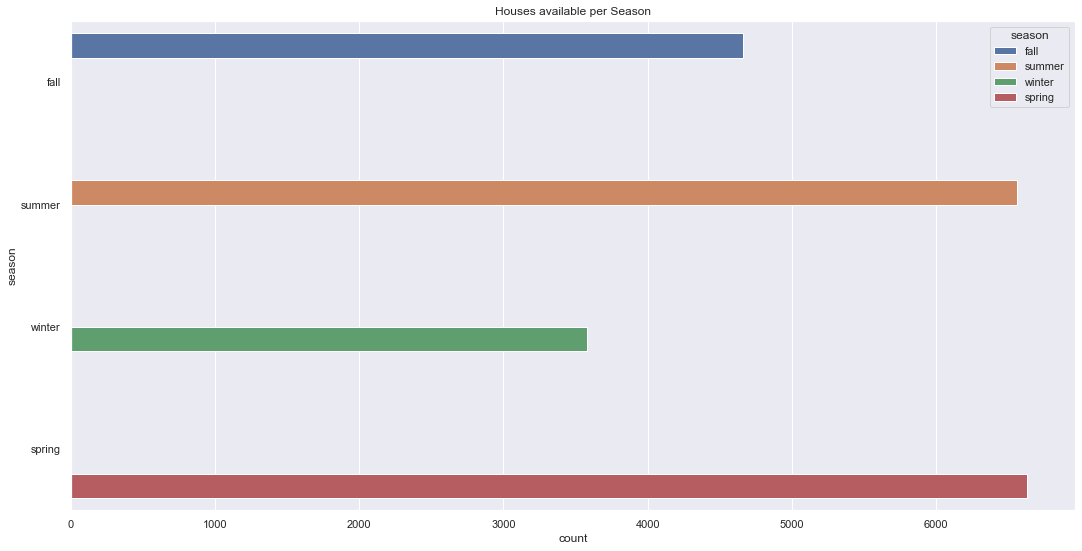

In [38]:
#houses available by season
ax = sns.countplot(y="season", hue="season", data=data).set(title='Houses available per Season')

<font size="6">EDA</font>


<font size="5">H1 - (Insight) Imóveis com vista para água são mais valorizados em mais de 150%</font>


<AxesSubplot:xlabel='waterfront', ylabel='price'>

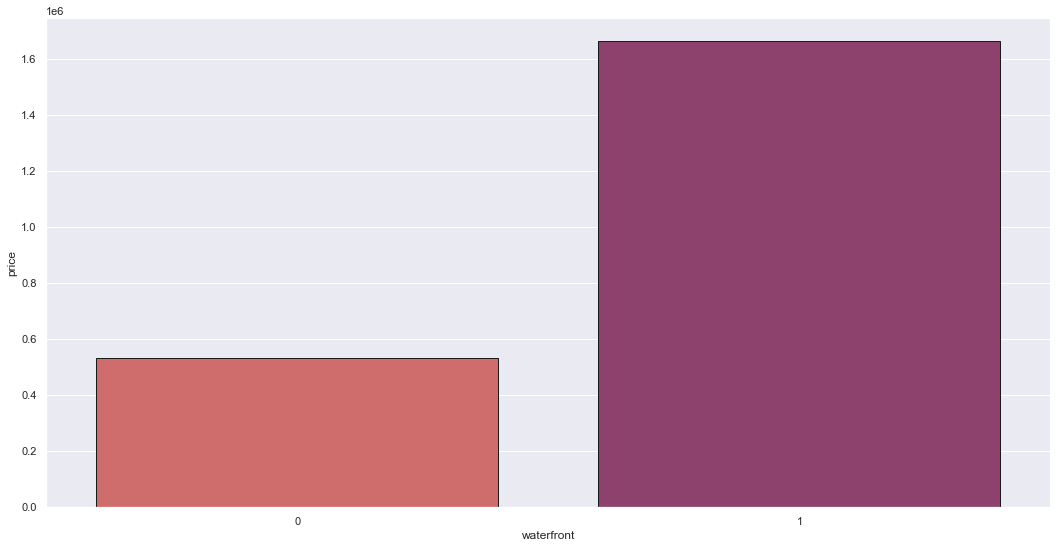

In [39]:
#com base no gráfico a seguir podemos perceber como imóveis com vista para agua são hipervalorizados
aux1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
barplot('waterfront', 'price', aux1)

<font size="5">H2 - Imóveis com data de construção menor que 1955, são 50% mais baratos na média.</font>

Falso: visto que os imóveis com data de construção menor que 1955 são cerca de menos de 2% mais barato em média

In [40]:
aux_builts = data[['yr_built', 'price']].copy()

aux_builts['yr_built'] = aux_builts['yr_built'].apply(lambda x: '<= 1955' if x <= 1955 else '>1955' )

aux_builts1 = aux_builts[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
aux_builts1['difference'] = aux_builts1['price'].pct_change()

aux_builts1

yr_built      price  difference
0  <= 1955 534369.352         NaN
1    >1955 543126.772       0.016

In [41]:
aux_built = data[['yr_built', 'price']].loc[data['yr_built'] <= 1955].groupby('yr_built').mean().reset_index()
aux_built2 = data[['yr_built', 'price']].loc[data['yr_built'] > 1955].groupby('yr_built').mean().reset_index()

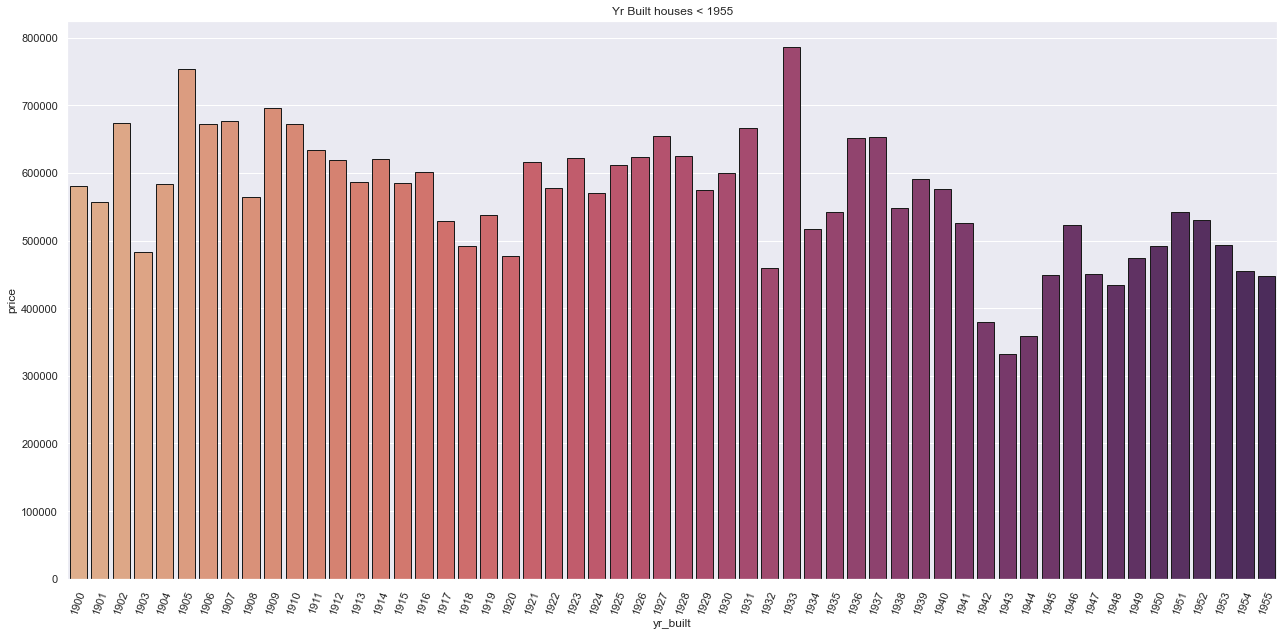

In [42]:
barplot('yr_built', 'price', aux_built).set(title='Yr Built houses < 1955')
plt.xticks(rotation=70)
plt.tight_layout()


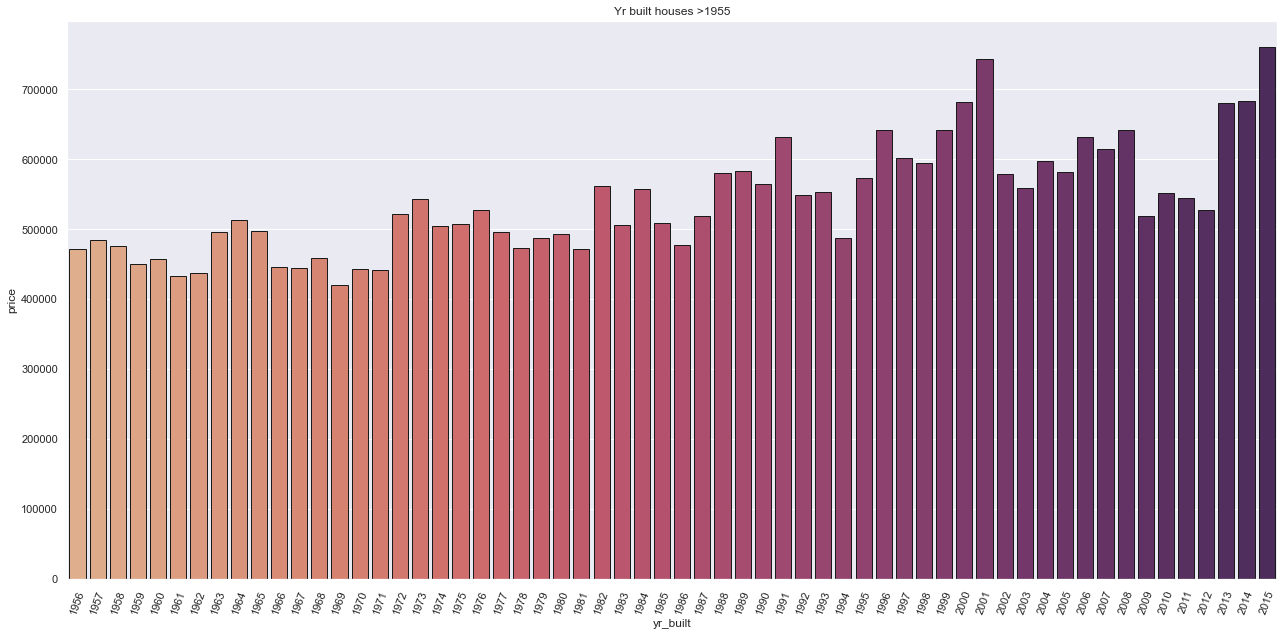

In [43]:
barplot('yr_built', 'price', aux_built2).set(title='Yr built houses >1955')
plt.xticks(rotation=70)
plt.tight_layout()


<font size="5">H3 - Imóveis sem porão possuem area total (sqrt_lot), são 50% maiores do que com porão.</font>

Falso, imóveis sem porão tem sim uma área maior de lote, mas apenas cerca de 22%

In [44]:
#agrupei os dados de porão e tabela, diferenciei o dado de porão em "tem porão", e "dont have", e com base nisso peguei o percentual

aux_basement = data[['sqft_basement', 'sqft_lot']].copy()

aux_basement['sqft_basement'] = aux_basement['sqft_basement'].apply(lambda x: 'have basement' if x !=0 else 'dont have')

aux_basement1 = aux_basement[['sqft_lot', 'sqft_basement']].groupby('sqft_basement').mean().reset_index()

aux_basement1.sort_values(by='sqft_lot', ascending=True, inplace=True)

aux_basement1['difference'] = aux_basement1['sqft_lot'].pct_change()

In [45]:
aux_basement1

sqft_basement  sqft_lot  difference
1  have basement 13295.995         NaN
0      dont have 16325.929       0.228

<AxesSubplot:xlabel='sqft_basement', ylabel='sqft_lot'>

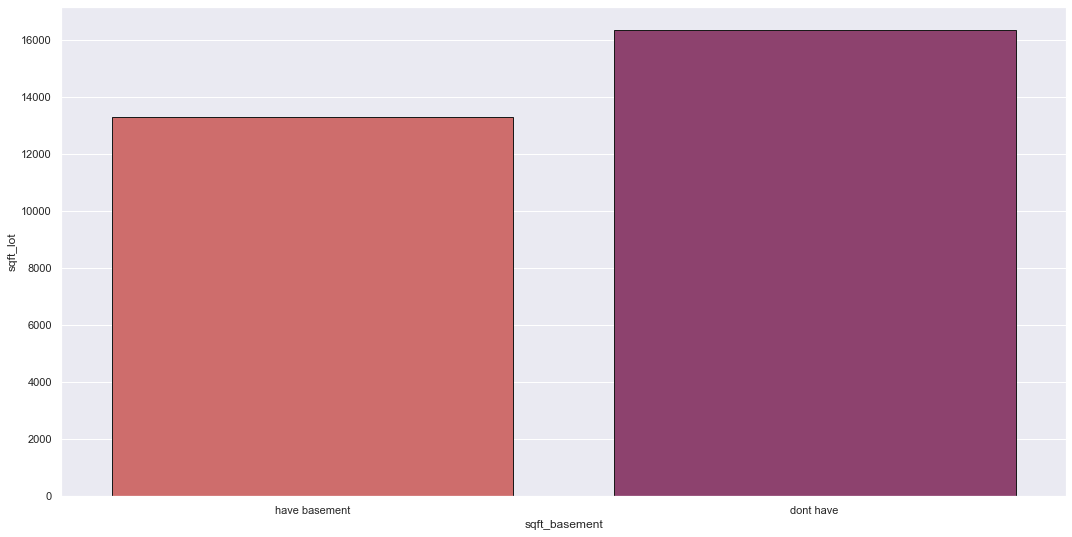

In [46]:
barplot('sqft_basement', 'sqft_lot', aux_basement1)

<font size="5">H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%</font>

Falso: Crescimento do preço dos imóveis é de em média, 21% ao ano

In [47]:
aux_year = data[['price', 'year']].loc[data['month'] == 5 ].copy()

aux_year1 = aux_year[['price', 'year']].groupby('year').mean().reset_index()

aux_year1['difference'] = aux_year1['price'].pct_change()

aux_year1

year      price  difference
0  2014 548080.277         NaN
1  2015 559563.460       0.021

<AxesSubplot:xlabel='year', ylabel='price'>

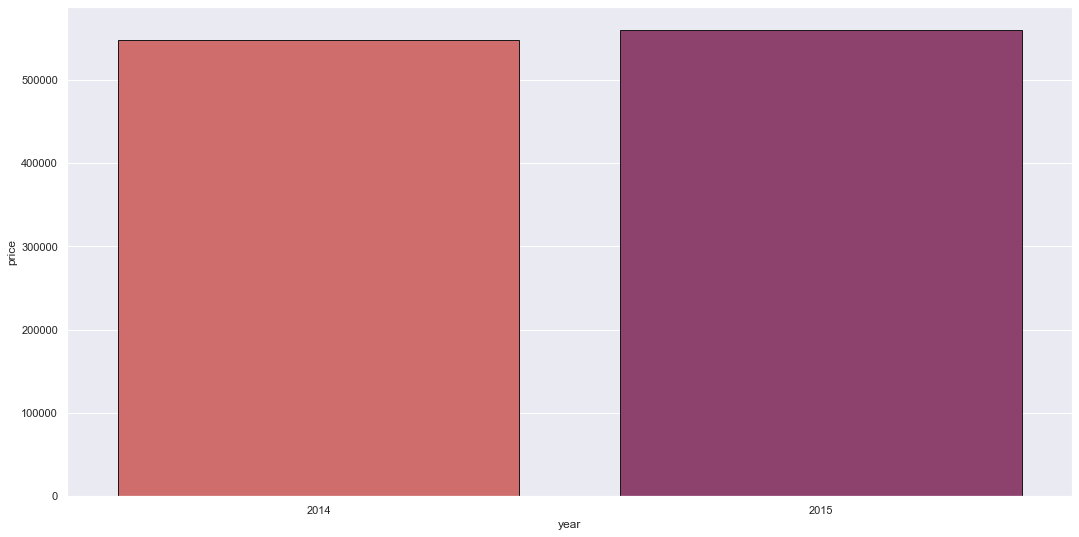

In [48]:
barplot('year', 'price', aux_year1)

<font size="5">H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%</font>

Falso: Imóveis com 3 banheiros não tem um crescimento MoM de 15%, se quer existe um crescimento exponencial devido a grande variação do preço de acordo com o mês

In [49]:
aux_bathrooms = data[['price', 'month', 'bathrooms']].loc[data['bathrooms'] == 3].groupby(['month']).mean().reset_index()
aux_bathrooms['difference'] = aux_bathrooms['price'].pct_change().mean()
aux_bathrooms

month      price  bathrooms  difference
0       1 668746.250      3.000       0.011
1       2 676910.442      3.000       0.011
2       3 769838.137      3.000       0.011
3       4 714629.988      3.000       0.011
4       5 689974.034      3.000       0.011
5       6 775057.564      3.000       0.011
6       7 741405.043      3.000       0.011
7       8 737576.562      3.000       0.011
8       9 645246.887      3.000       0.011
9      10 645523.015      3.000       0.011
10     11 679910.465      3.000       0.011
11     12 728341.188      3.000       0.011

<AxesSubplot:xlabel='month', ylabel='price'>

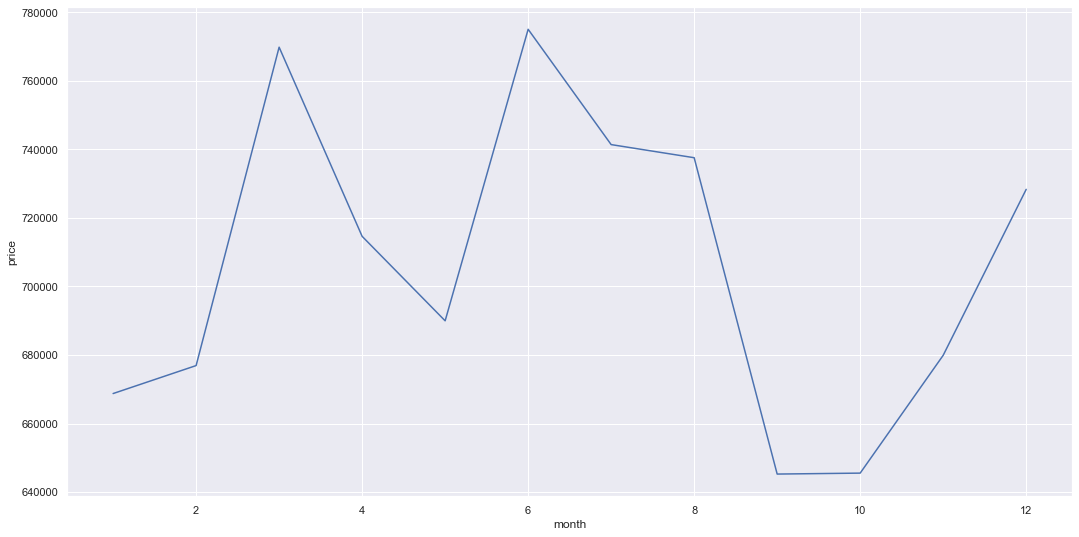

In [50]:
sns.lineplot(x='month', y='price', data=aux_bathrooms)

<font size="5">H6: Imóveis com 4 ou mais quartos tem uma valorização de 50%</font>

Verdadeiro: imóveis com 4 ou mais quartos tendem a custar 50% a mais do valor do que de imóveis com 3 ou menos quartos, sendo assim
    existe uma excelente oportunidade para comprar casas  de 3 quartos e fazer uma pequena reforma afim de valorizar o imóvel

In [54]:
aux_bedrooms = data[['bedrooms', 'price']].copy()

aux_bedrooms['bedrooms'] = aux_bedrooms['bedrooms'].apply(lambda x: '<= 3' if x <=3 else '>3' )

aux_bedrooms1 = aux_bedrooms[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
aux_bedrooms1['difference'] = aux_bedrooms1['price'].pct_change()
aux_bedrooms1

bedrooms      price  difference
0     <= 3 449994.271         NaN
1       >3 671485.781       0.492

[Text(0.5, 1.0, 'Mean Price per Bedrooms')]

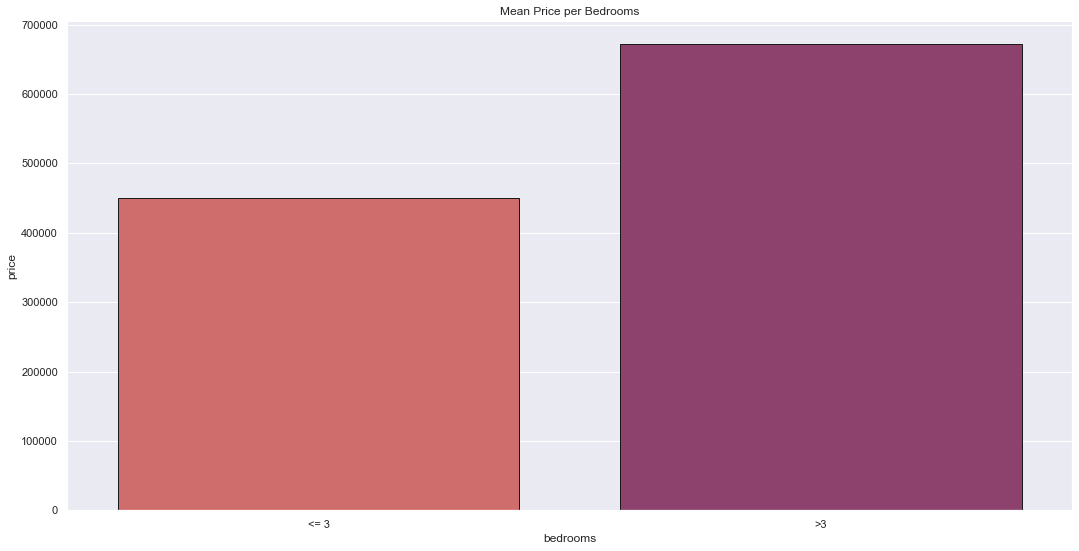

In [56]:
barplot('bedrooms', 'price', aux_bedrooms1).set(title='Mean Price per Bedrooms')

In [58]:
data.dtypes

id                              int64
date                   datetime64[ns]
price                         float64
bedrooms                        int64
bathrooms                     float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
waterfront                      int64
view                            int64
condition                       int64
grade                           int64
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
zipcode                         int64
lat                           float64
long                          float64
sqft_living15                   int64
sqft_lot15                      int64
m2_living                     float64
m2_lot                        float64
m2_basement                   float64
m2_above                      float64
day                             int64
week_of_year

<font size="5">H7: Imóveis com condition igual ou maior que 4 sofre uma valorização de 10% ao mês</font>